## K Means Clustering - Mixture Models


Importing Required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

Importing the Data

In [23]:
df= pd.read_csv("/content/adult.csv")
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9298,37,Self-emp-not-inc,121510,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K
15542,49,State-gov,154493,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,44,United-States,<=50K
12554,34,Private,226296,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
28879,47,Private,347025,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
23653,35,Private,188972,HS-grad,9,Widowed,Exec-managerial,Unmarried,White,Female,0,0,30,United-States,<=50K


## Age Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


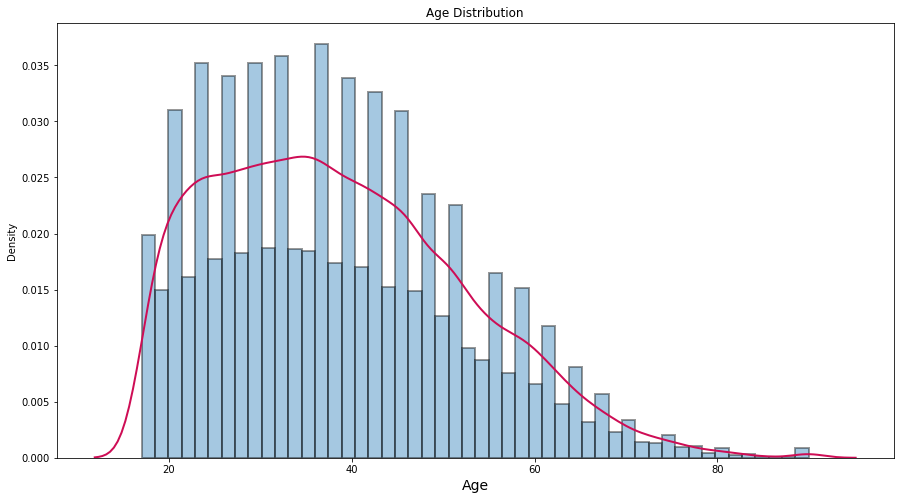

In [13]:
plt.figure(figsize=(15,8))
ax=sns.distplot(df['age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age',fontsize = 14);

## Visualizing the Data - Numerical


<function matplotlib.pyplot.show>

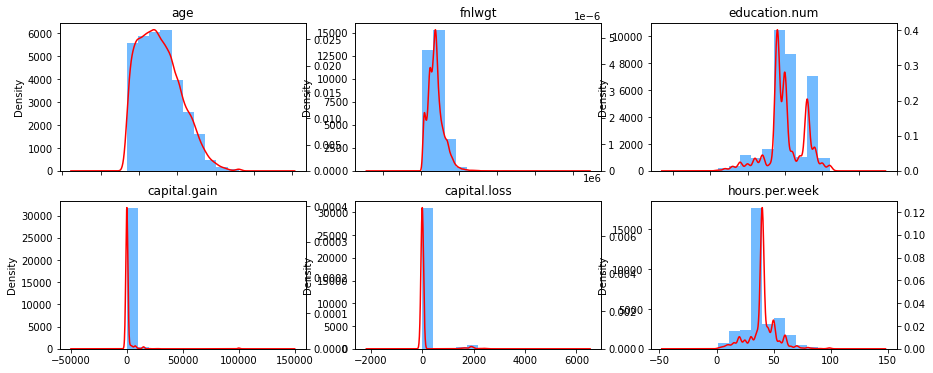

In [9]:
features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss','hours.per.week']
data_num = df[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#73bbff')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

#fig.tight_layout()
plt.show

## Age vs Capital Gain

My view for selecting age and capital gain is by looking at the subplot distributions and also wanted to see if there are some notable changes in capital gain after a certain age.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


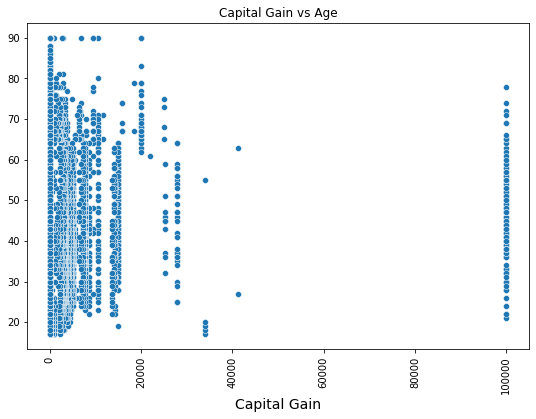

In [25]:
fig = plt.figure(figsize = (9,6))
ax=sns.scatterplot(df['capital.gain'],df['age'])
ax.set_title('Capital Gain vs Age')
plt.xlabel("Capital Gain",fontsize = 14);
plt.xticks(rotation=90)
plt.ylabel('');

I see that population of various ages has higher capital gain than majority of the population.Let's try applying our K-means algorithm to see if we can capture datapoints in a cluster.

In [26]:
# Euclidean distance calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [42]:
import os
def kmeans(dataset, xlabel, ylabel, k):
    # # Get dataset name without extension or path
    dataset_name = os.path.splitext(os.path.basename(dataset))[0]
    

    #Dimensions of plot
    plt.rcParams['figure.figsize'] = (16, 9)
    plt.style.use('ggplot')

    print(dataset_name)
    # Importing the dataset
    data = pd.read_csv(dataset)
    print("Input data and shape:")
    print(data.shape)
    data.head()

    # Getting the values and plotting it
    f1 = data[xlabel].values
    f2 = data[ylabel].values
    X = np.array(list(zip(f1, f2)))
    plt.scatter(f1, f2, c='black',s=5)

    # X and Y coordinates of random centroids
    C_x = np.random.randint(np.min([i[0] for i in X]), np.max([i[0] for i in X]), size=k)
    C_y = np.random.randint(np.min([i[1] for i in X]), np.max([i[1] for i in X]), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    print("Initial Centroids:")
    print(C)

    # Add centroid to plot
    plt.scatter(C_x, C_y, marker='o', s=100, c='black')

    # Save initial plot
    plt.title("Initial: {}".format(dataset_name))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("{}/{}_{}_initial.png".format(dataset_name, xlabel, ylabel))
    plt.show()
    plt.close()

    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Clustering labels
    clusters = np.zeros(len(X))

    # Loop until distance between new centroids and old centroids is zero
    error = dist(C, C_old, None)
    while error != 0:
        # Assigning each value to closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing old centroid values
        C_old = deepcopy(C)
        # Finding new centroids (average value)
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)

    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

    # Save clustering plot
    plt.title("Clustering: {}".format(dataset_name))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("{}/{}_{}_clustering.png".format(dataset_name, xlabel, ylabel))
    plt.show()
    plt.close()



Let's apply K-means algorithm to the Census dataset we choose to see how Age and capital gain varies

adult
Input data and shape:
(32561, 15)
Initial Centroids:
[[6.8000e+01 5.4648e+04]
 [3.8000e+01 3.5090e+03]]


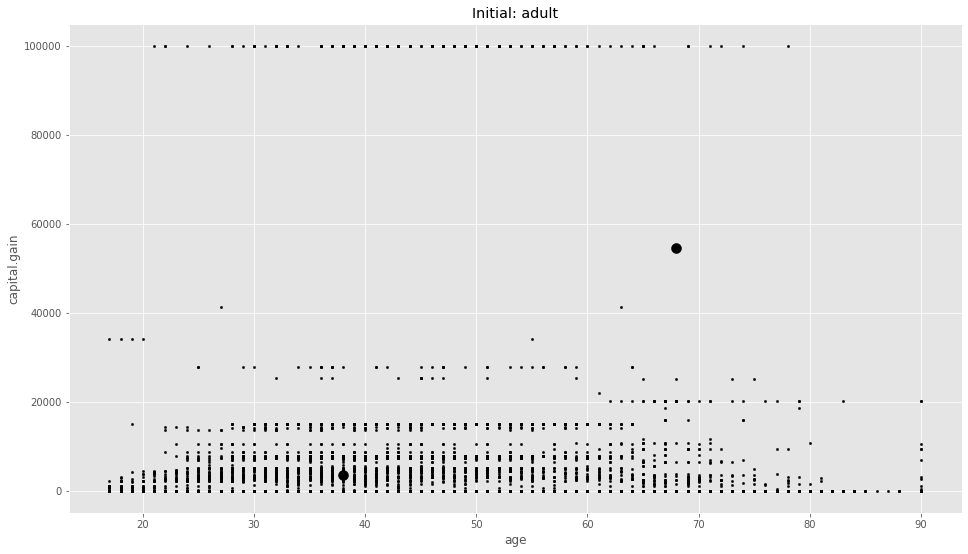

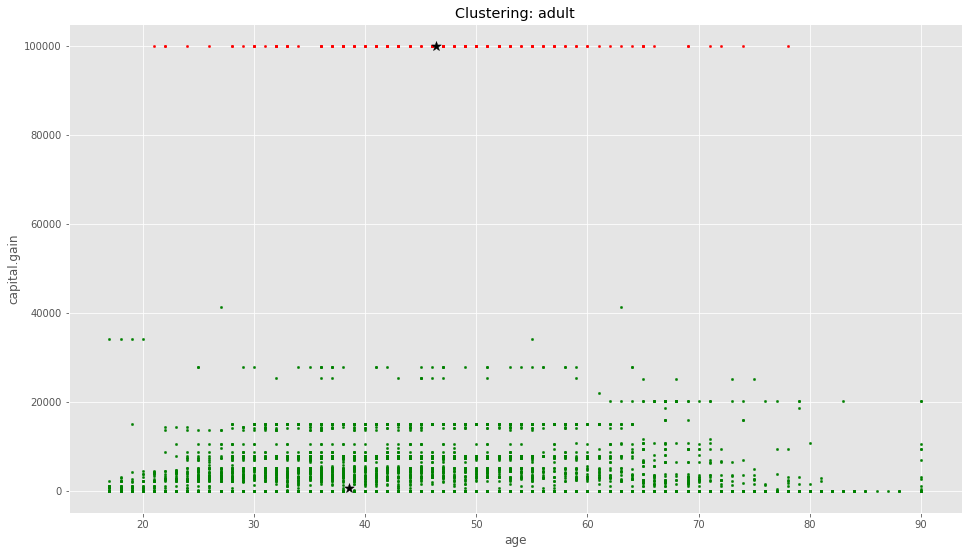

In [43]:
data="adult.csv"
x = "age"
y="capital.gain"
k=2 #Initial clusters

kmeans(data,x,y,k)

Let's apply K-means algorithm to the Census dataset we choose to see how Age and Education.num varies

adult
Input data and shape:
(32561, 15)
Initial Centroids:
[[58. 10.]
 [30.  5.]]


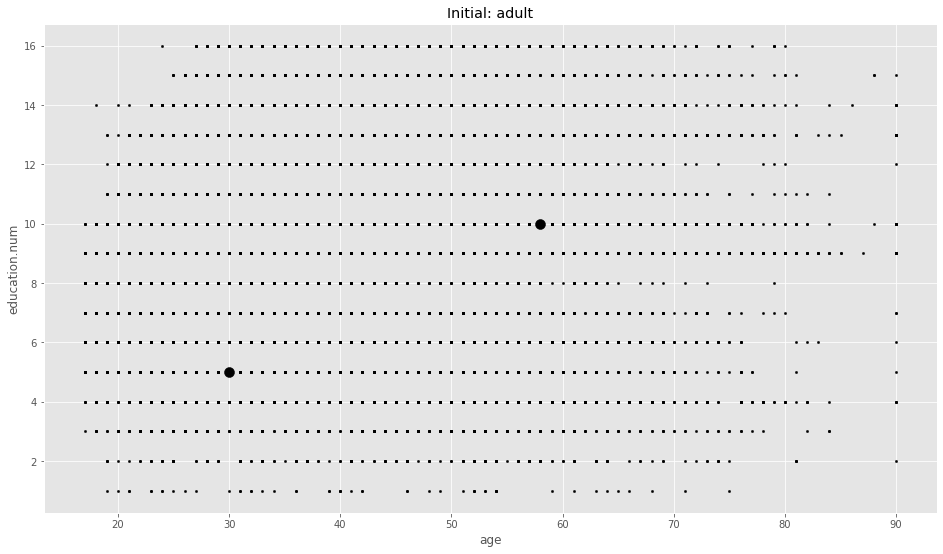

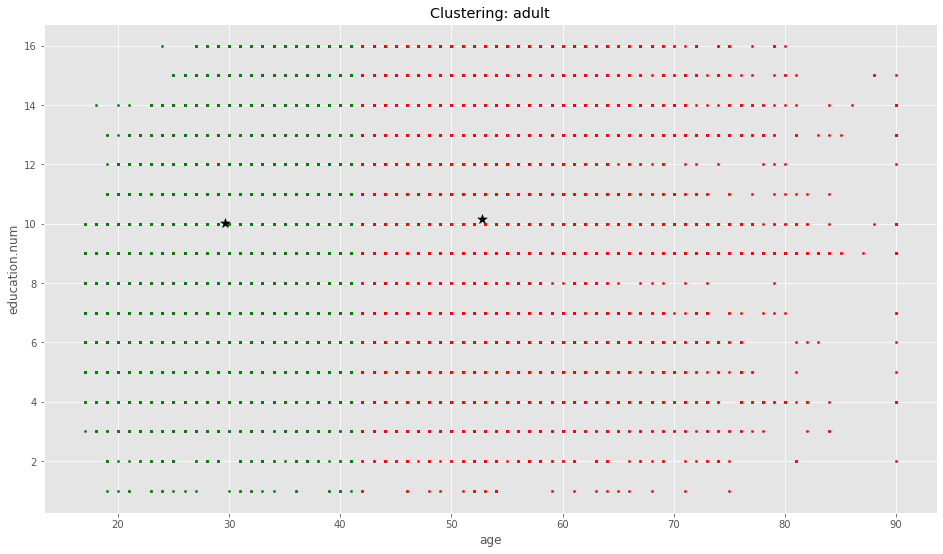

In [44]:
data="adult.csv"
x = "age"
y="education.num"
k=2 #Initial clusters

kmeans(data,x,y,k)

## Conclusion

Main motto of implementing k-means and testing it is to see how well it captures the data into clusters. From the above graphs we can conclude that k-means performed just as well for the second time when used for both age vs capitalgain and age vs education.num